In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from json_parser_grype import create_df

In [2]:
df= create_df()
print(df)

      VulnerabilityID                  PkgName     Status    Severity  \
0       CVE-2011-3374  debian:distro:debian:12  not-fixed  Negligible   
1       CVE-2022-0563  debian:distro:debian:12  not-fixed  Negligible   
2       CVE-2016-2781  debian:distro:debian:12   wont-fix         Low   
3      CVE-2017-18018  debian:distro:debian:12  not-fixed  Negligible   
4       CVE-2023-4039  debian:distro:debian:12   wont-fix      Medium   
...               ...                      ...        ...         ...   
12874   CVE-2022-0563  debian:distro:debian:12  not-fixed  Negligible   
12875   CVE-2022-0563  debian:distro:debian:12  not-fixed  Negligible   
12876  CVE-2021-31879  debian:distro:debian:12   wont-fix      Medium   
12877  CVE-2023-45853  debian:distro:debian:12   wont-fix    Critical   
12878  CVE-2023-45853  debian:distro:debian:12   wont-fix    Critical   

      Container  
0         nginx  
1         nginx  
2         nginx  
3         nginx  
4         nginx  
...         ...

<Axes: >

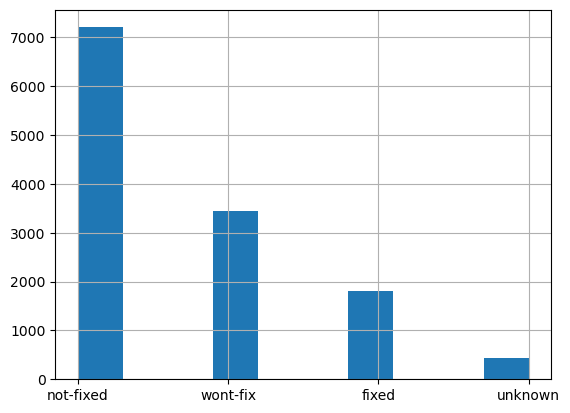

In [3]:
df['Status'].hist()

<Axes: >

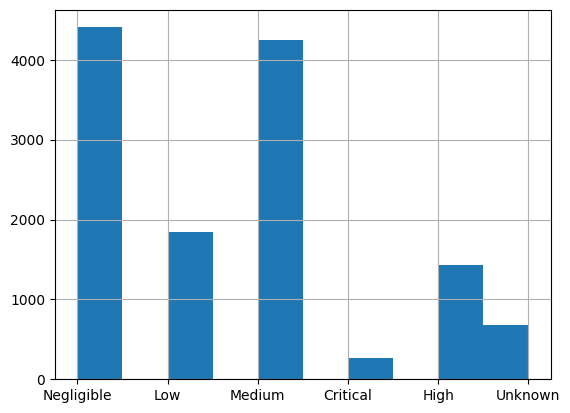

In [4]:
df['Severity'].hist()

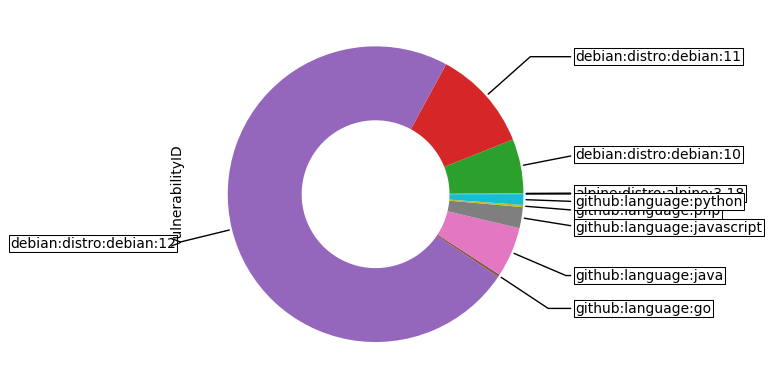

In [4]:
import numpy as np
import random
df_plot = df.groupby(['Namespace']).count().head(10)
axes = df_plot.plot.pie(y='VulnerabilityID', startangle=0, radius=1, legend=None, labels=None, wedgeprops=dict(width=0.5))
wedges = axes.patches
bbox_props = dict(boxstyle="square,pad=0.1", fc="w", ec="k", lw=0.75)
kw = dict(arrowprops=dict(arrowstyle="-"),
          bbox=bbox_props, zorder=1, va="center")

for i, p in enumerate(wedges):
    name_df = df_plot.iloc[[i]].index.tolist()[0]
    ang = (p.theta2 - p.theta1)/2. + p.theta1
    y = np.sin(np.deg2rad(ang))
    x = np.cos(np.deg2rad(ang))
    horizontalalignment = {-1: "right", 1: "left"}[int(np.sign(x))]
    connectionstyle = f"angle,angleA=0,angleB={ang}"
    kw["arrowprops"].update({"connectionstyle": connectionstyle})
    axes.annotate(name_df, xy=(x, y), xytext=(1.35*np.sign(x), 1.4*y),
                horizontalalignment=horizontalalignment, **kw)

In [5]:
containers = df['Container'].unique()

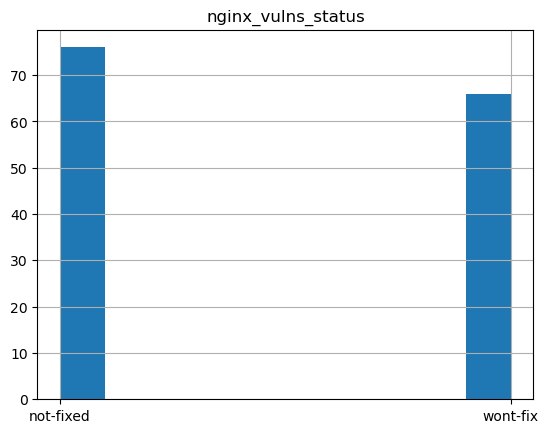

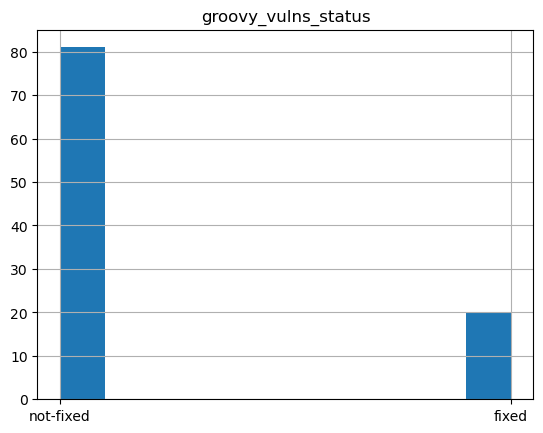

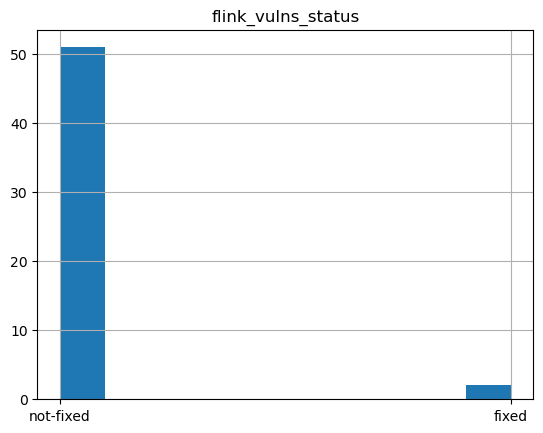

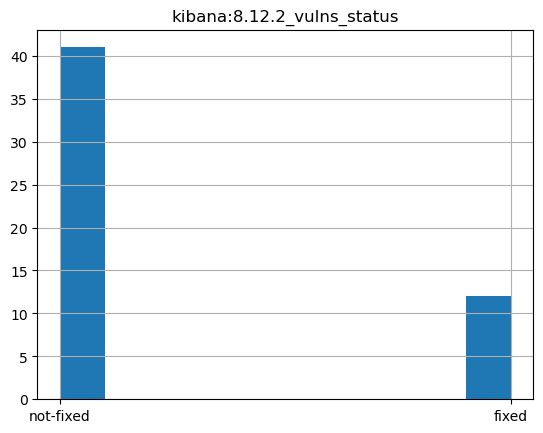

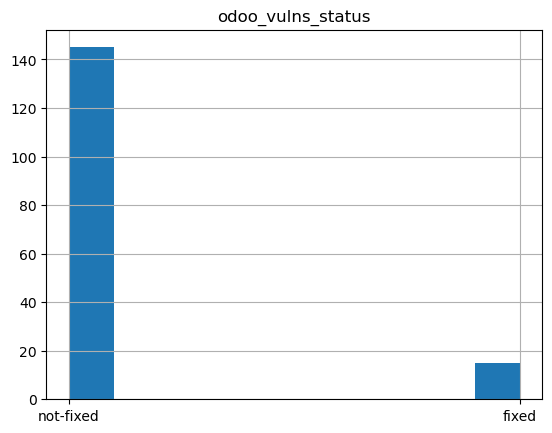

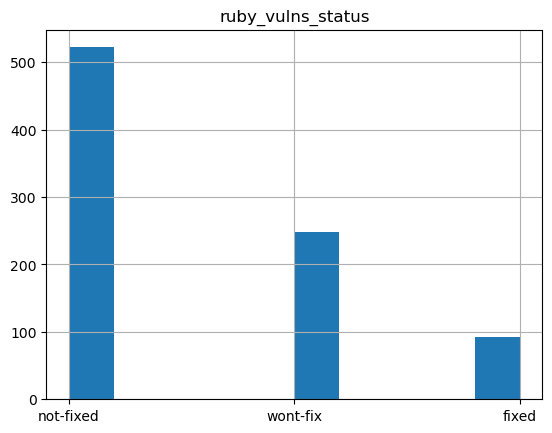

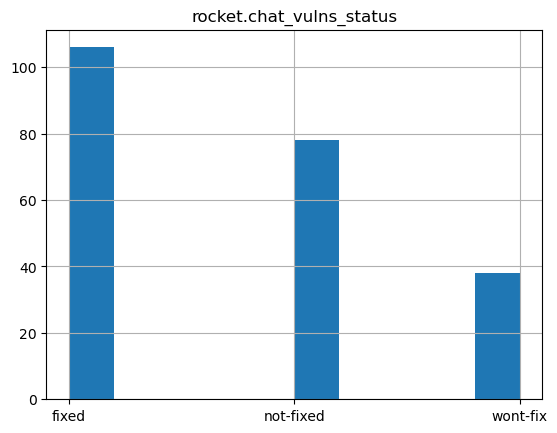

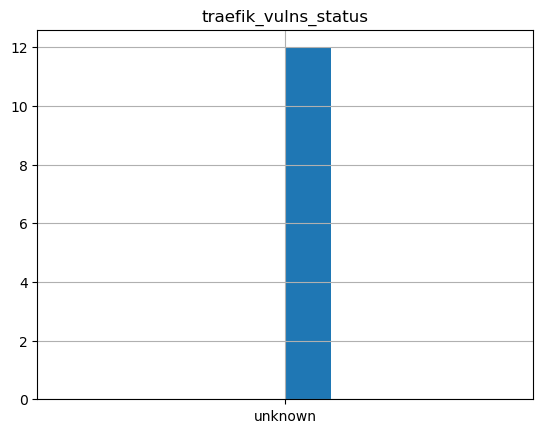

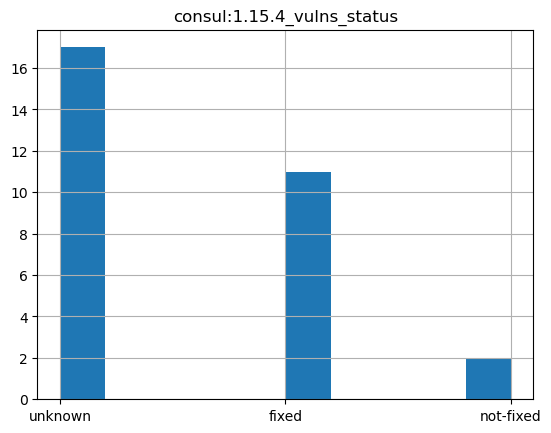

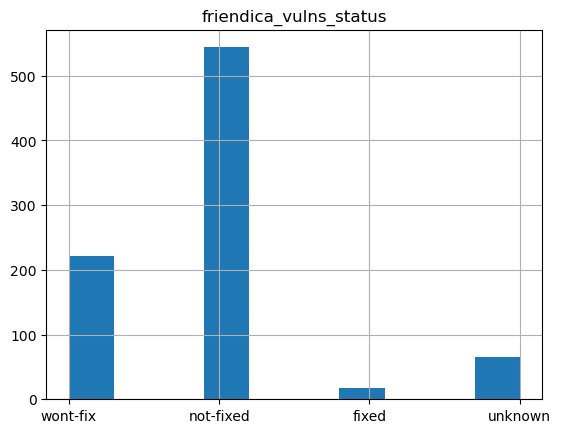

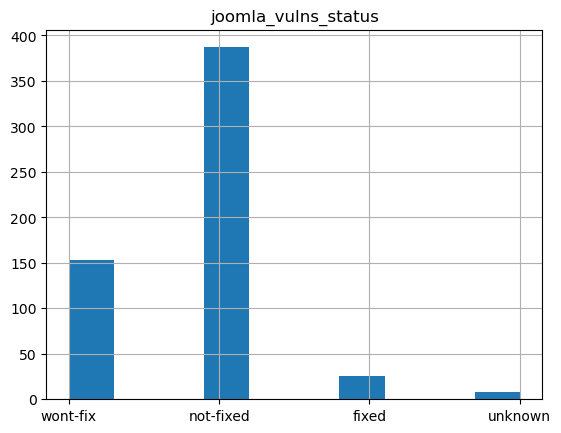

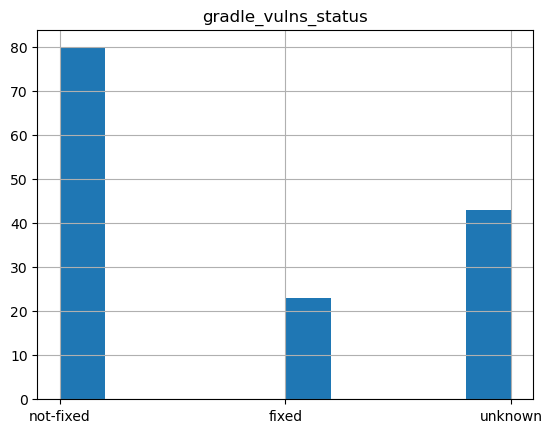

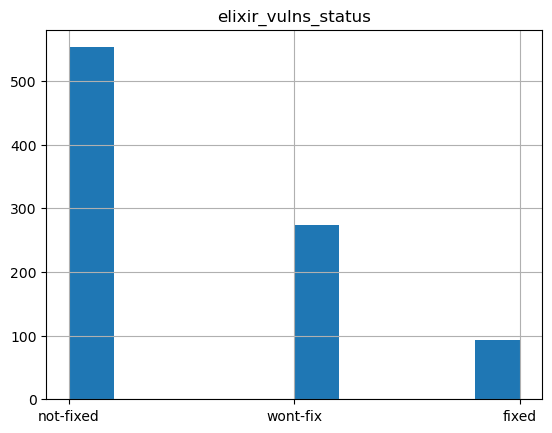

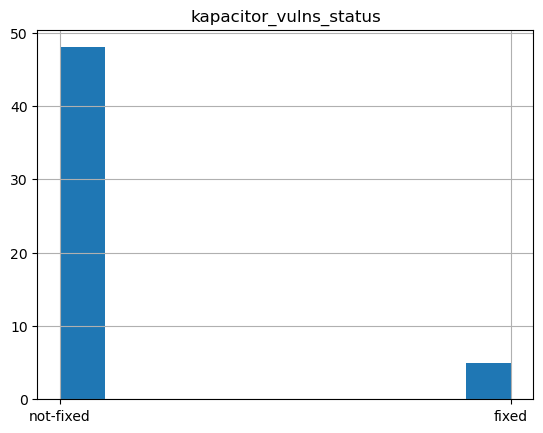

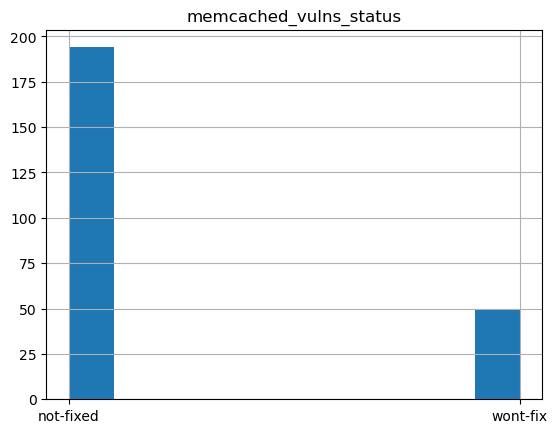

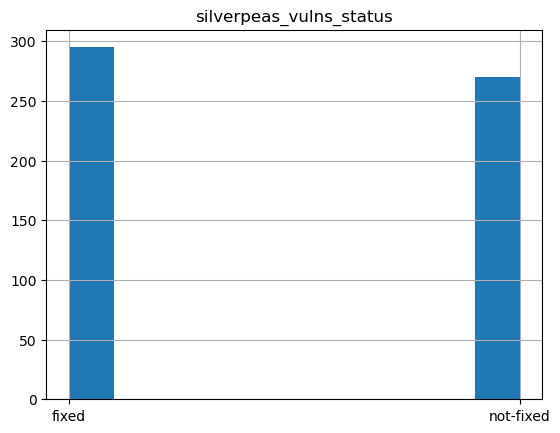

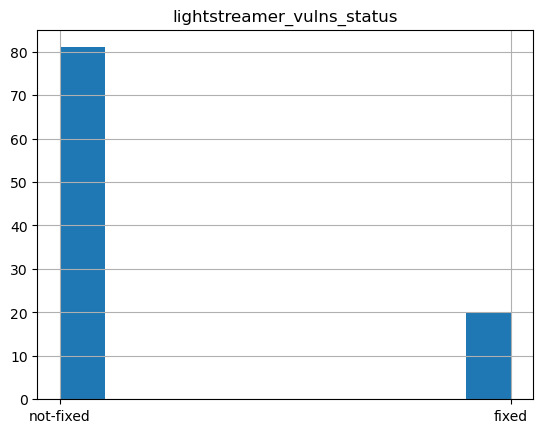

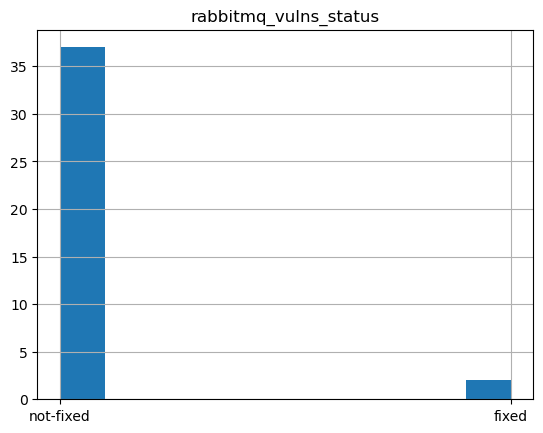

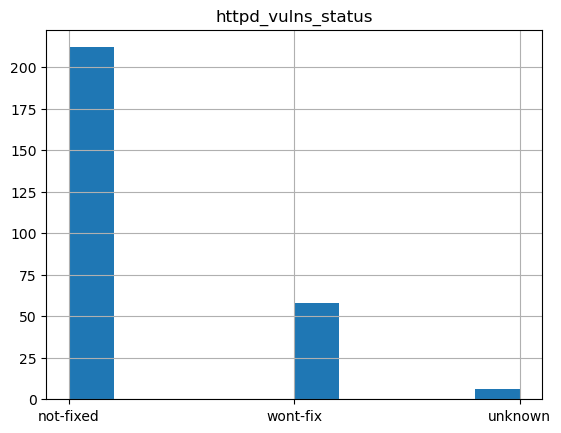

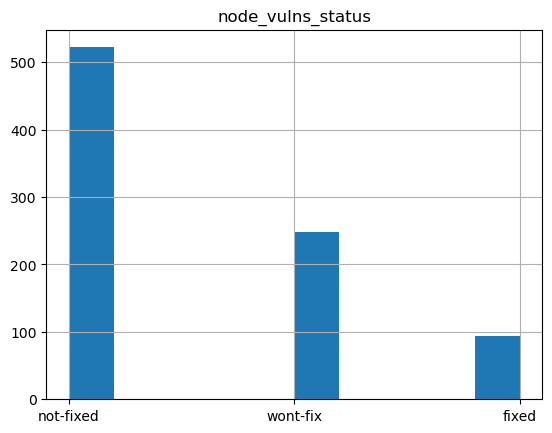

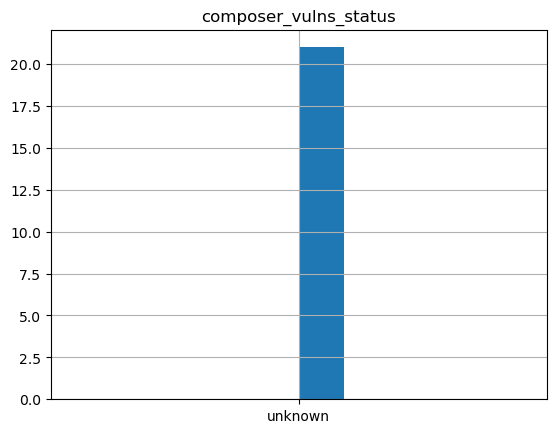

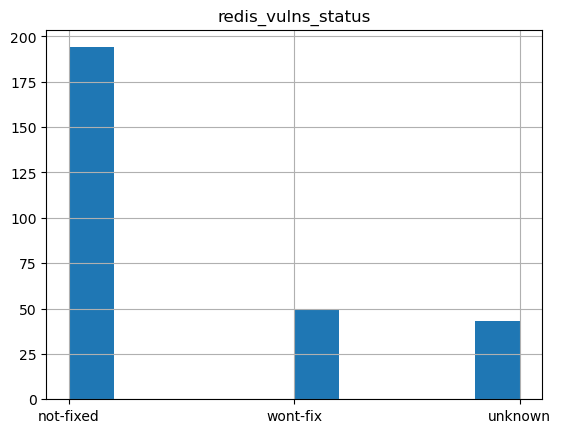

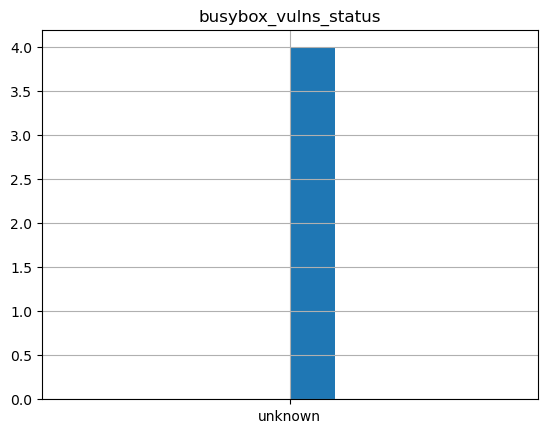

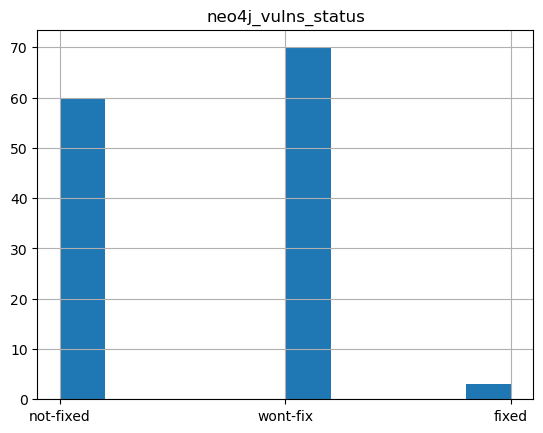

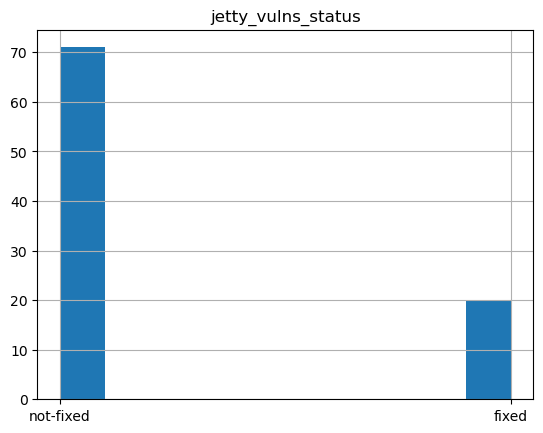

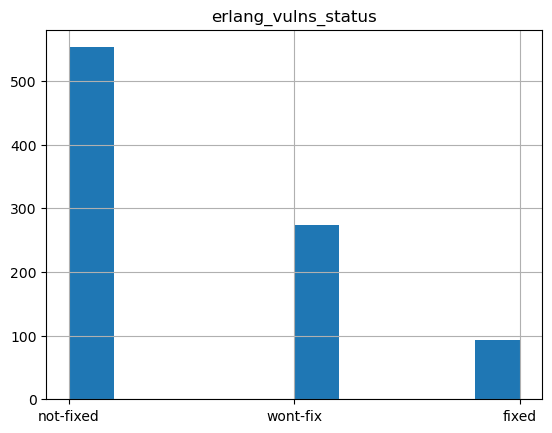

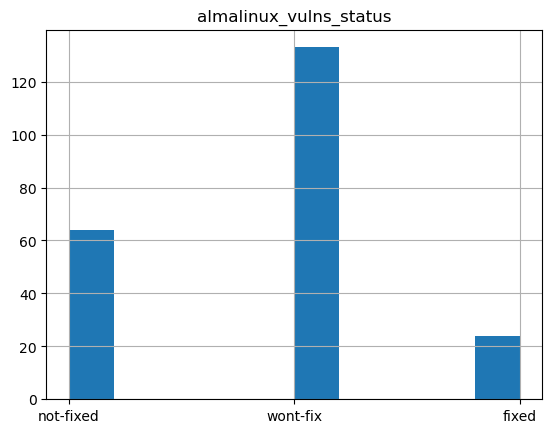

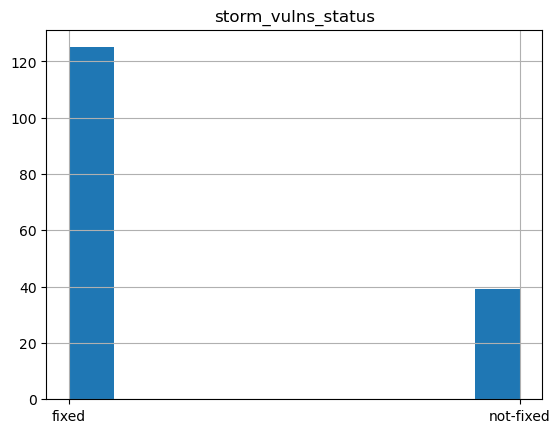

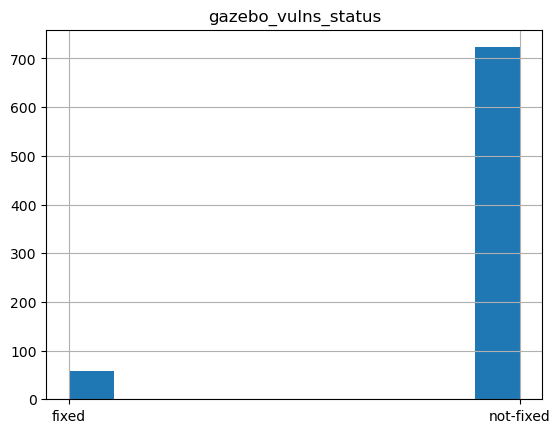

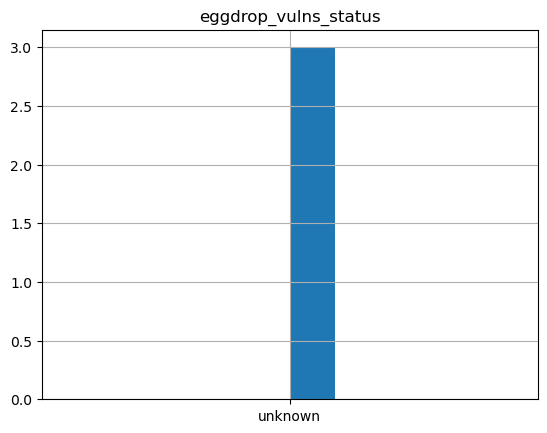

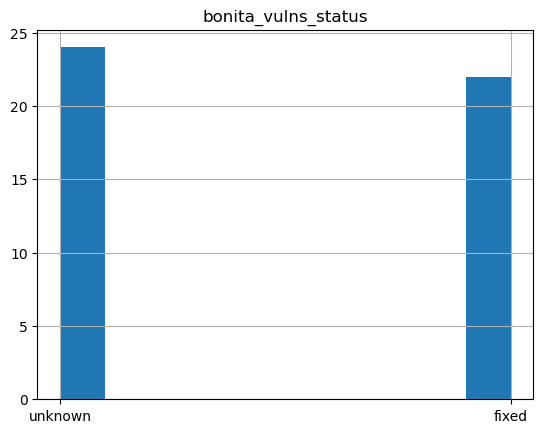

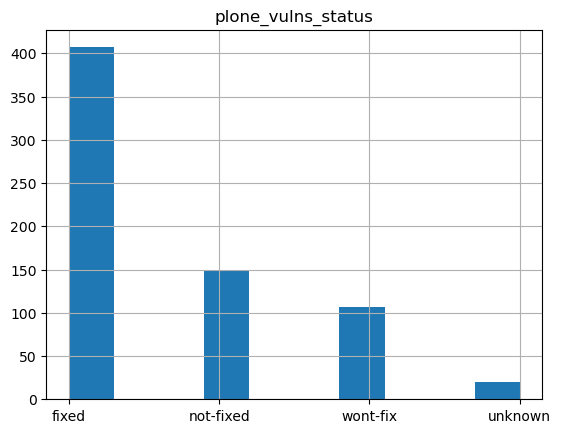

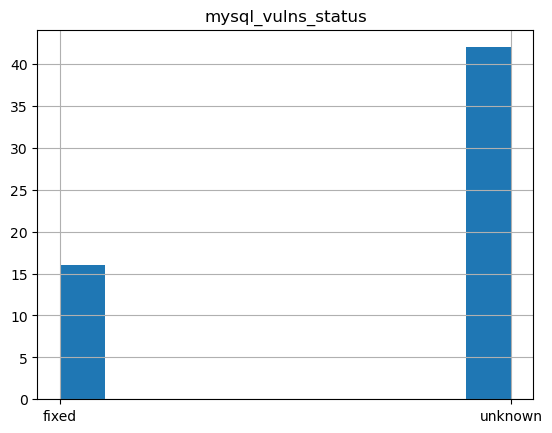

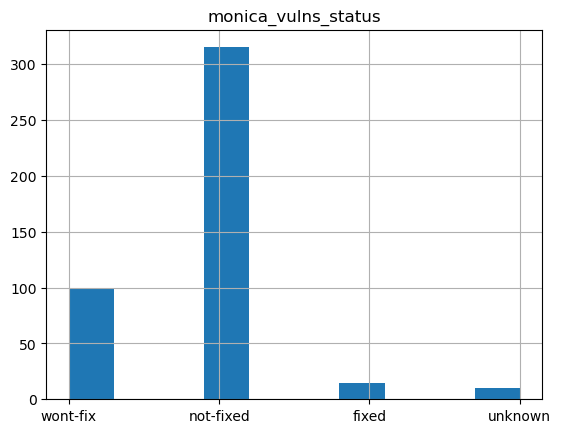

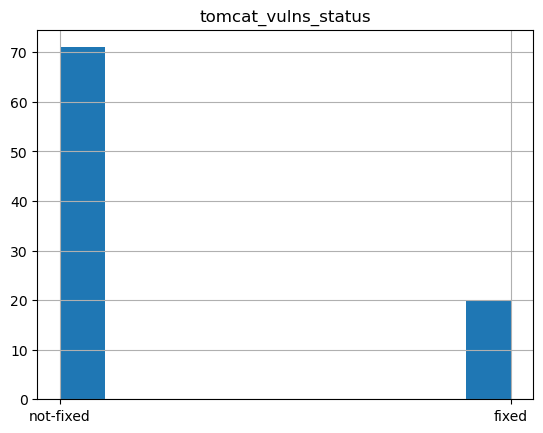

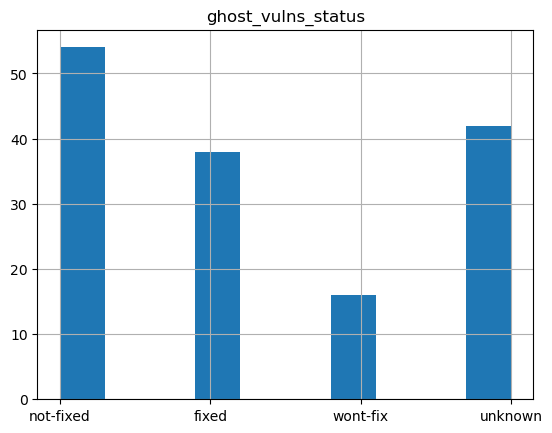

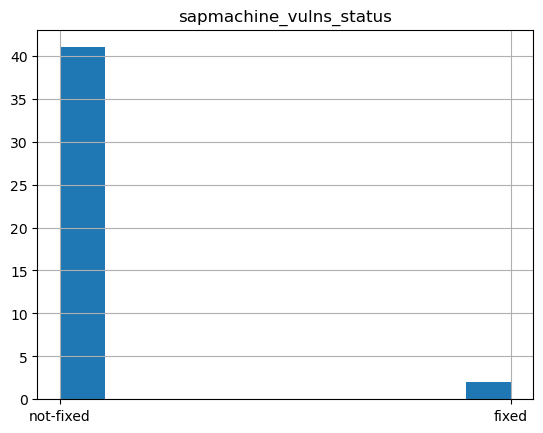

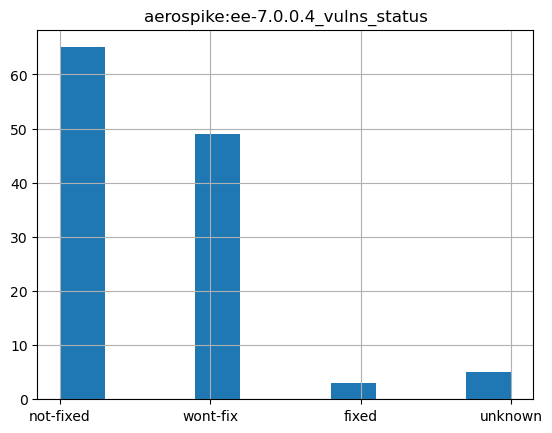

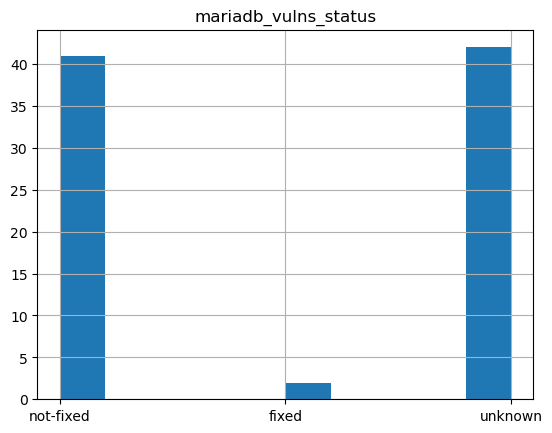

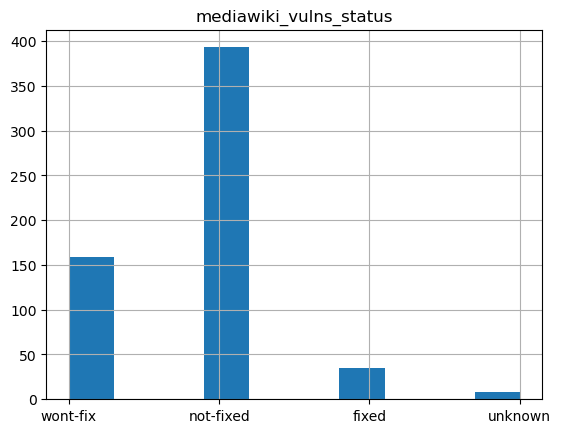

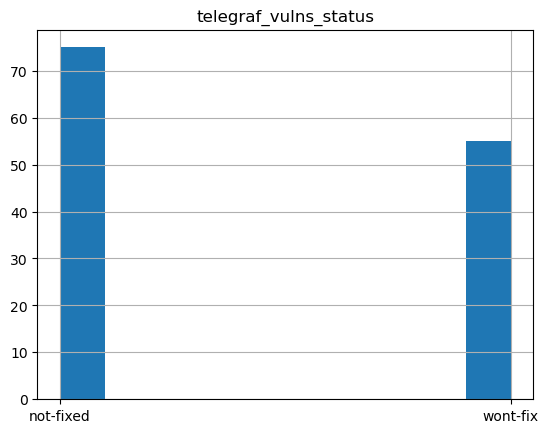

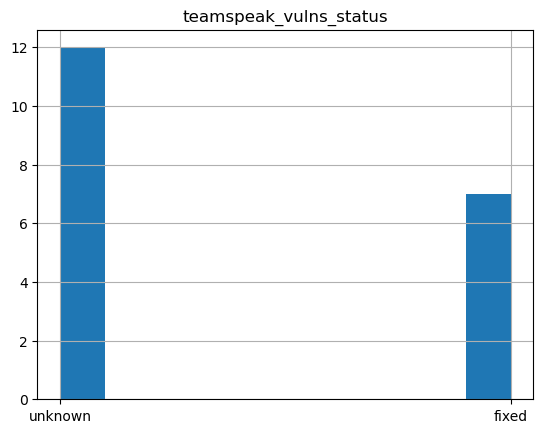

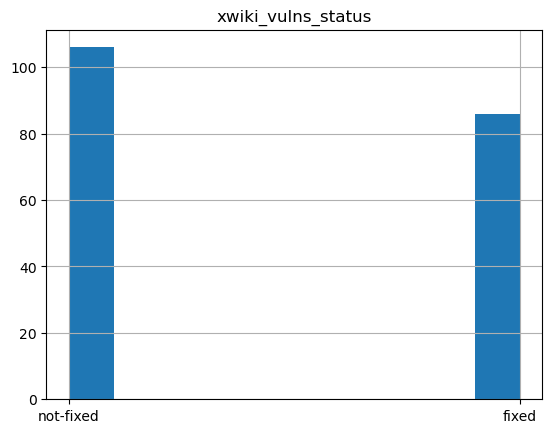

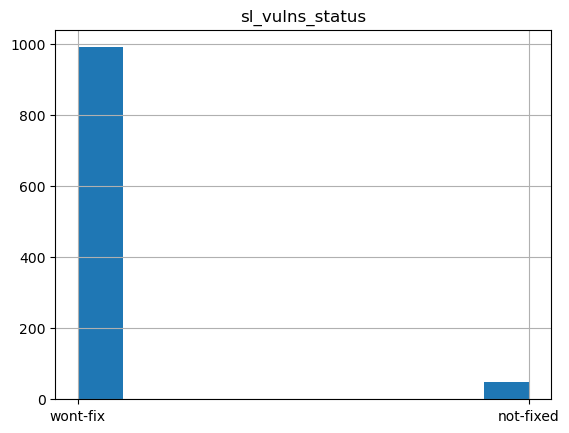

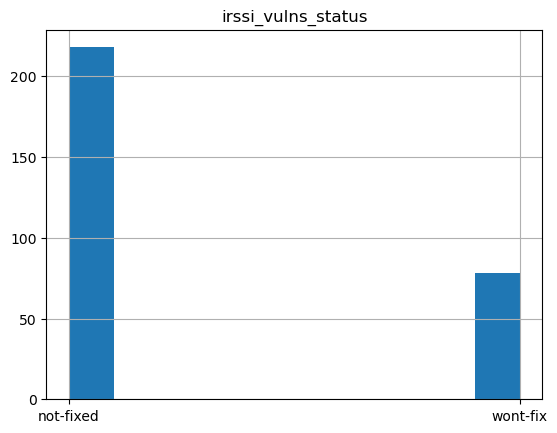

In [6]:
for container in containers:
    df.loc[df['Container'] == container]['Status'].hist()
    plt.title(container+"_vulns_status")
    plt.show()

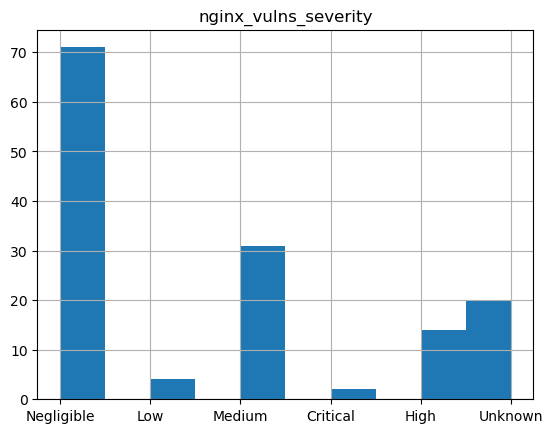

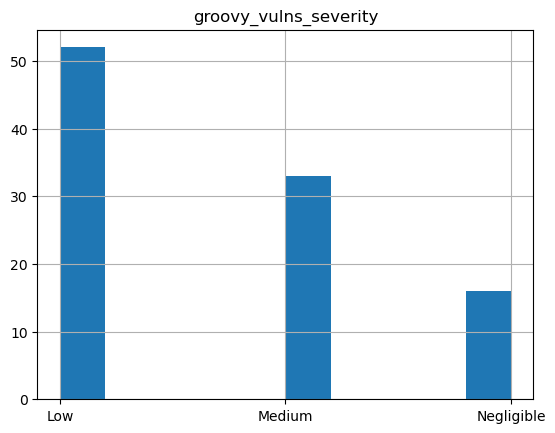

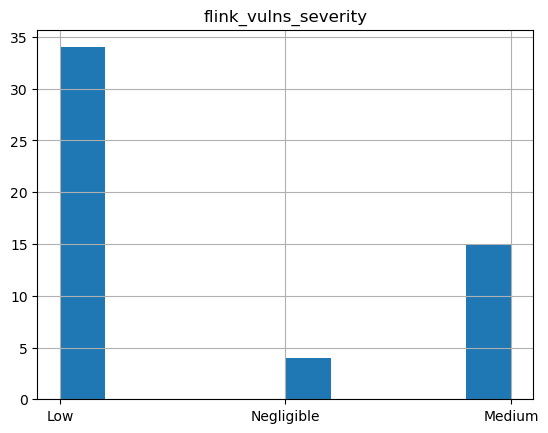

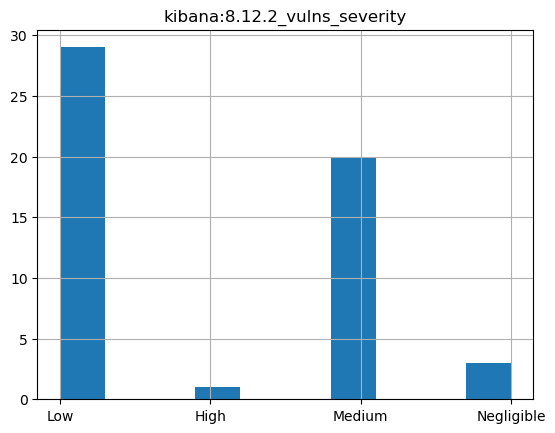

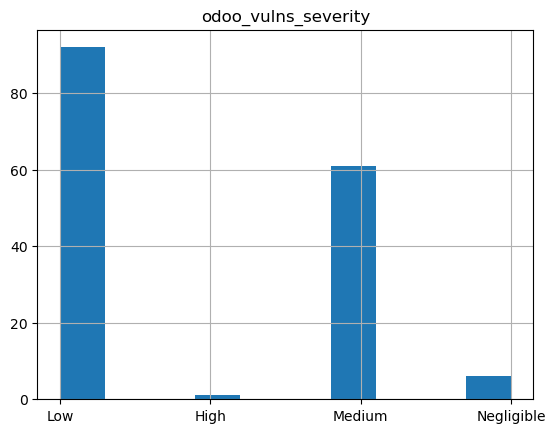

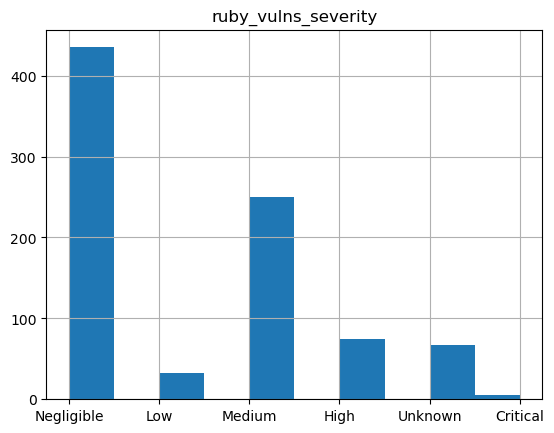

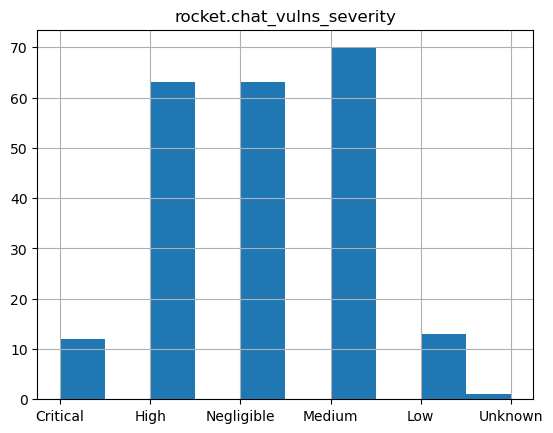

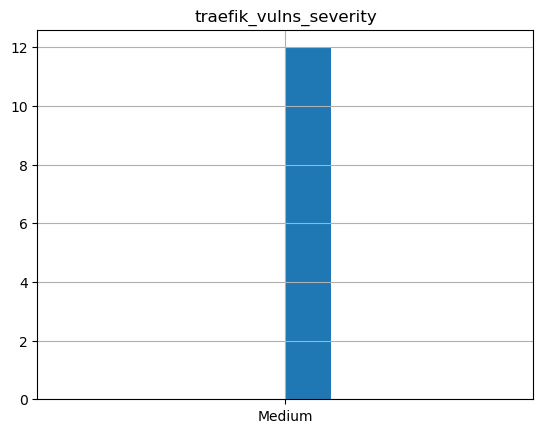

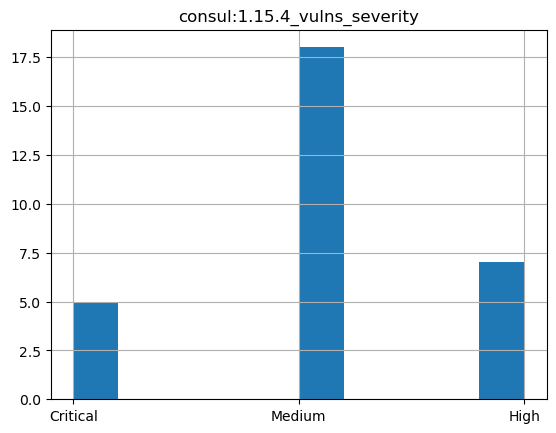

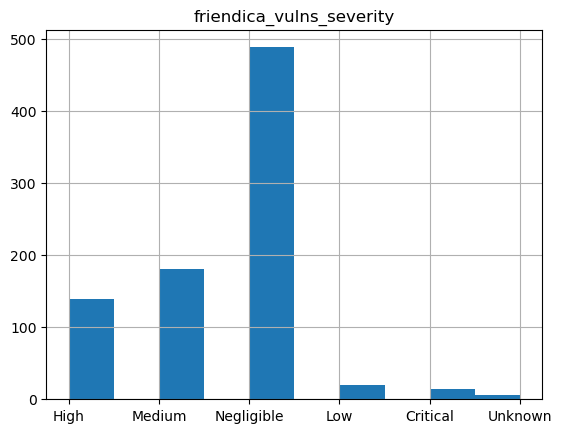

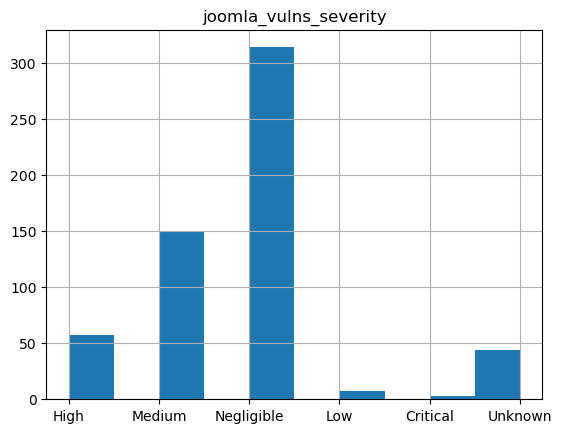

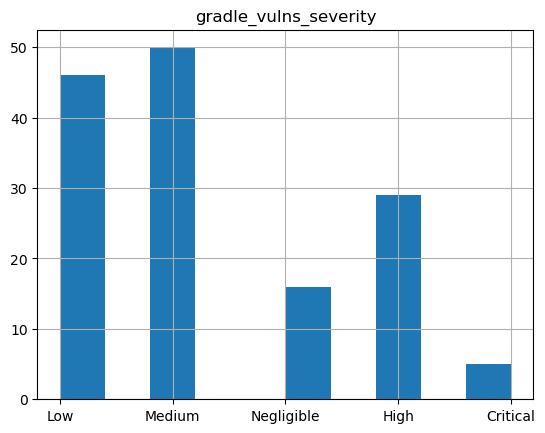

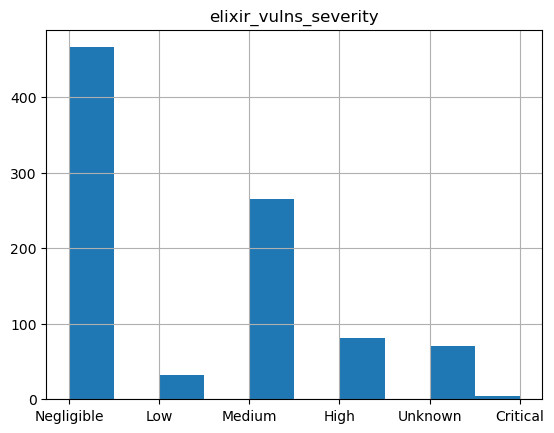

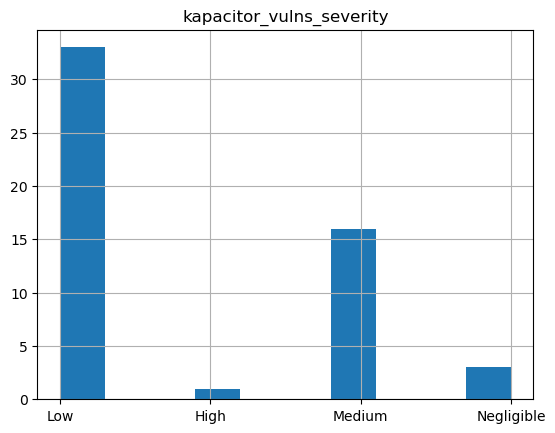

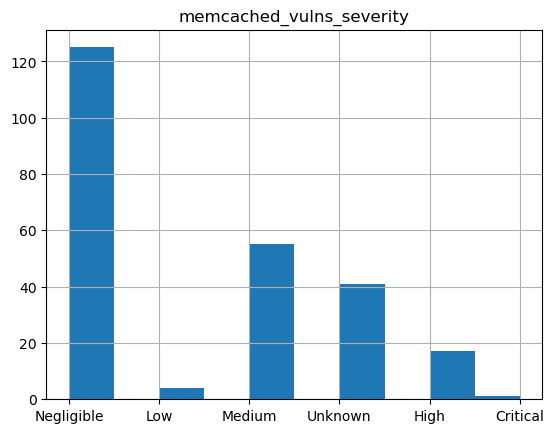

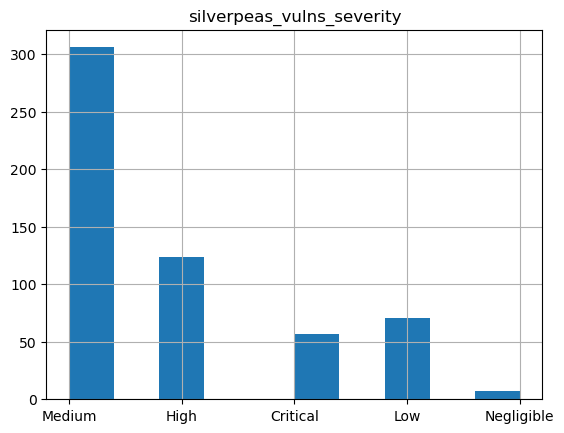

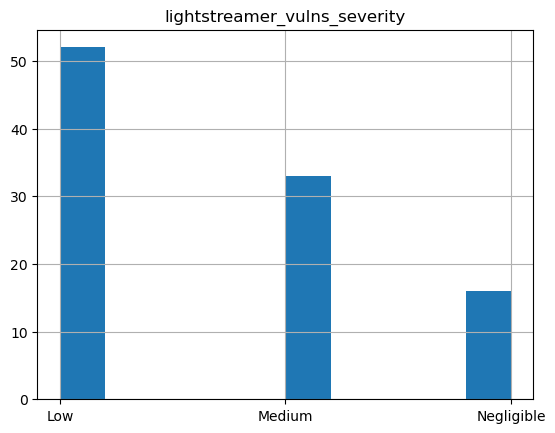

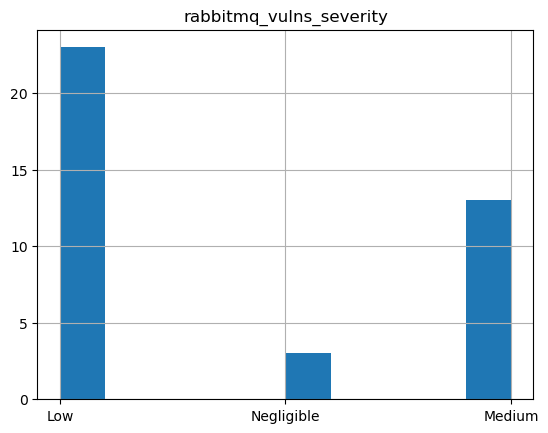

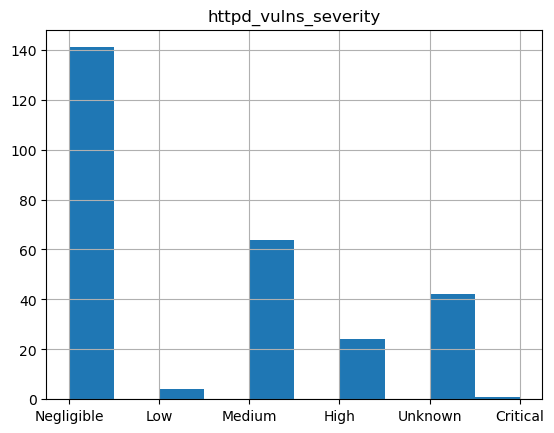

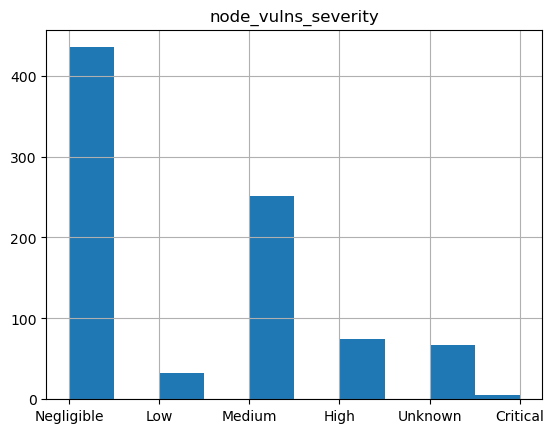

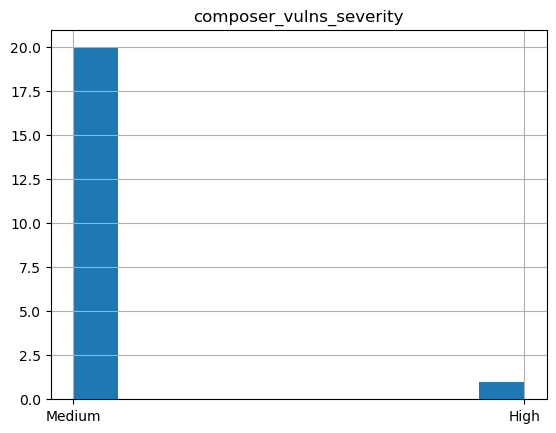

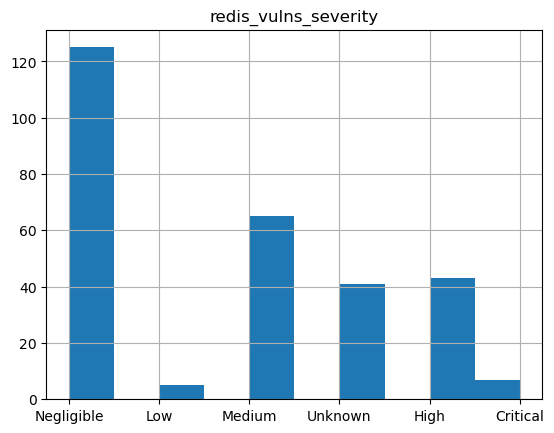

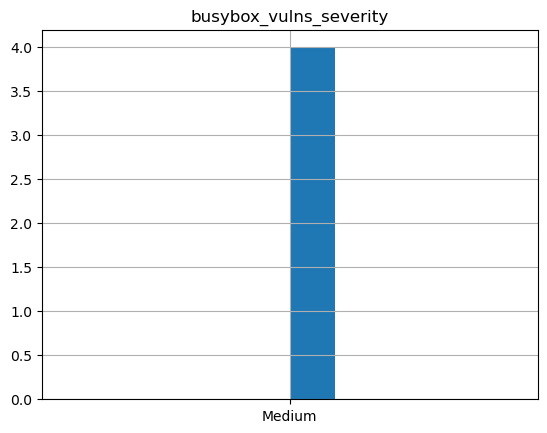

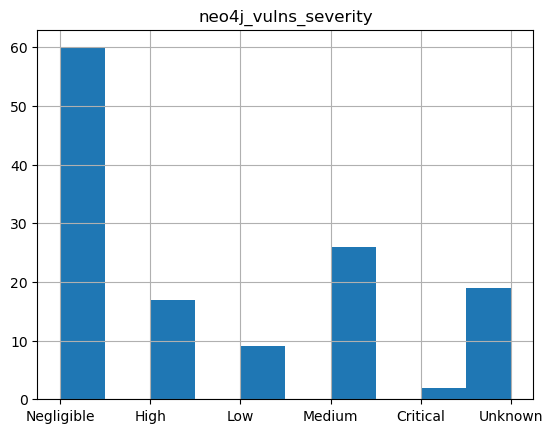

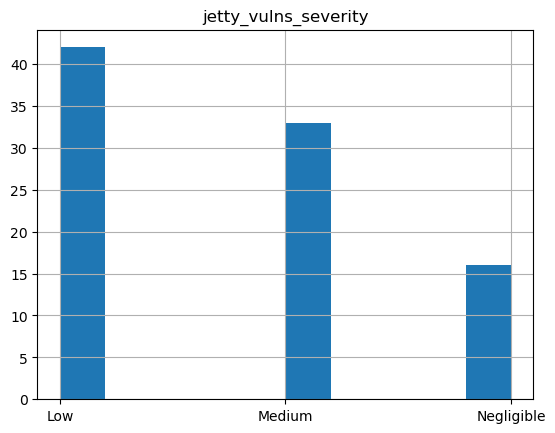

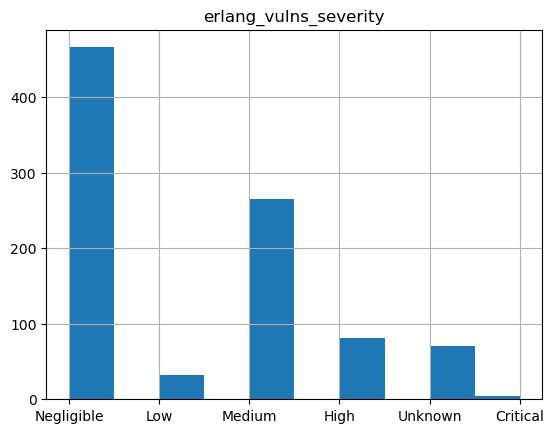

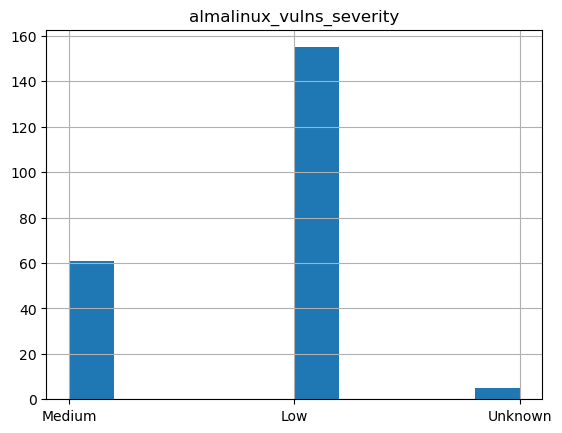

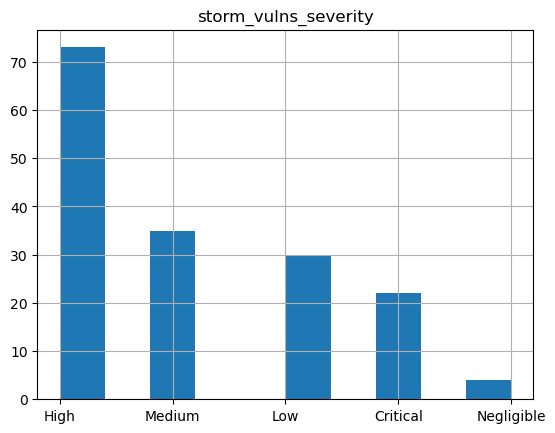

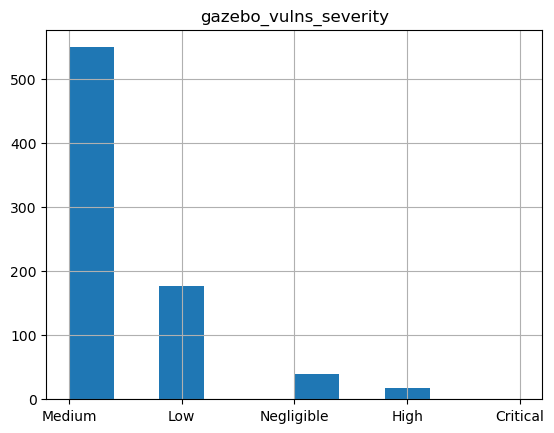

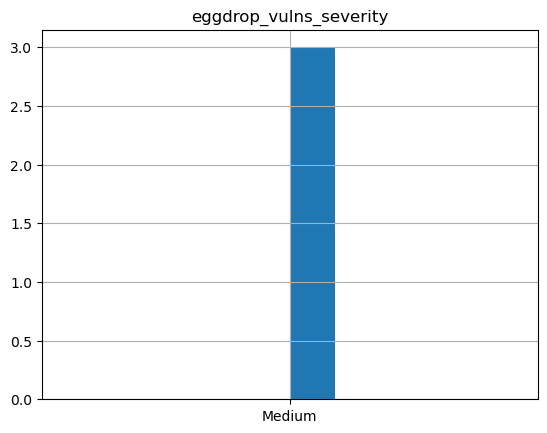

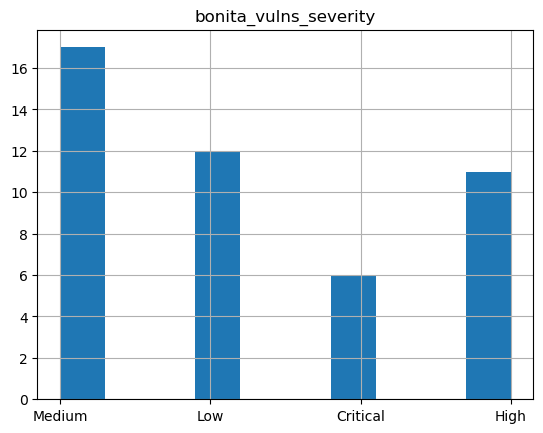

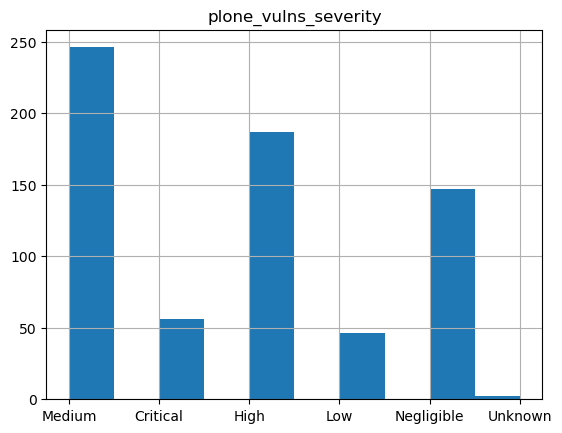

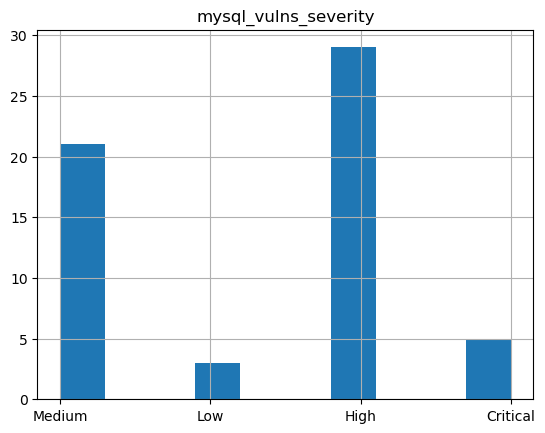

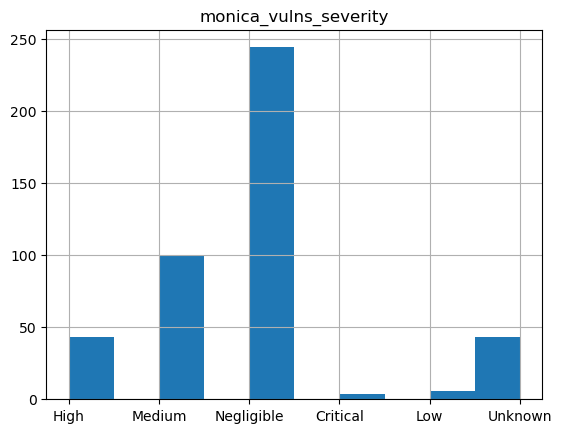

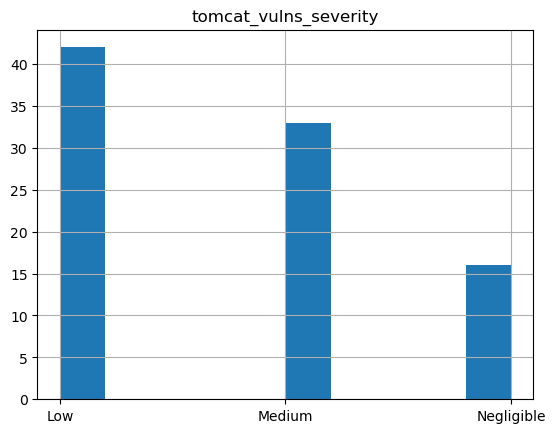

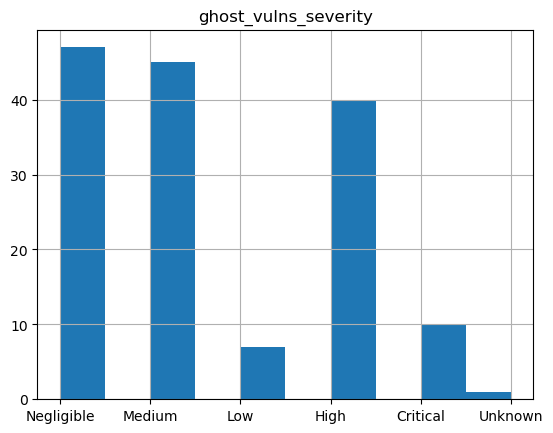

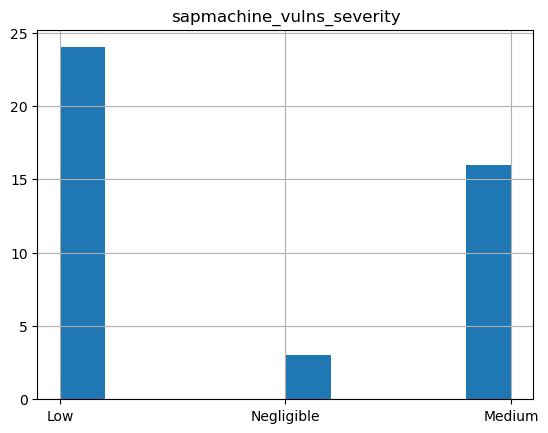

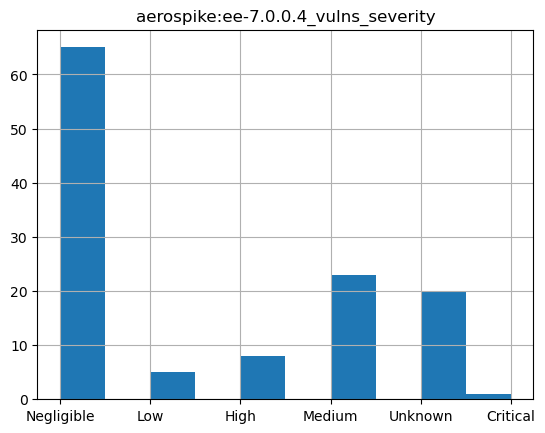

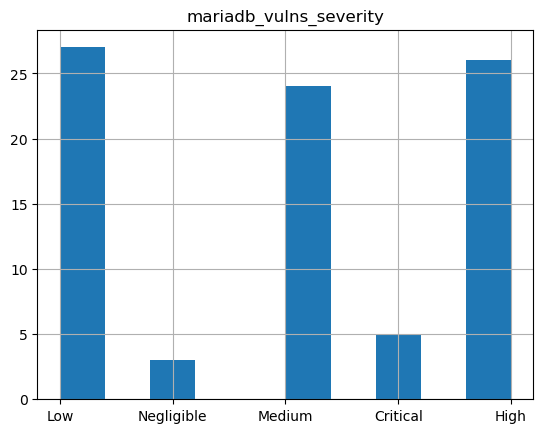

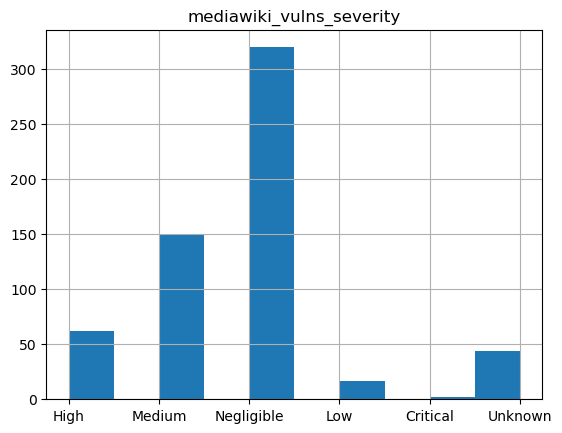

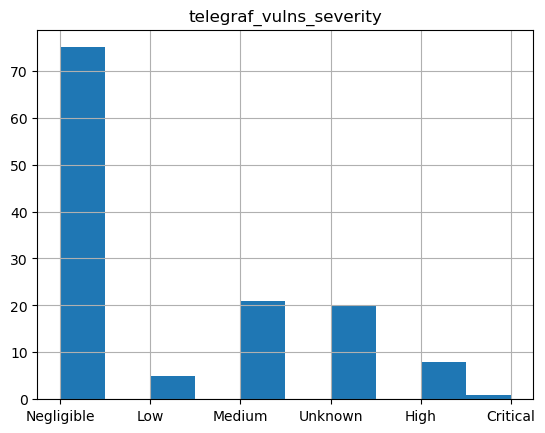

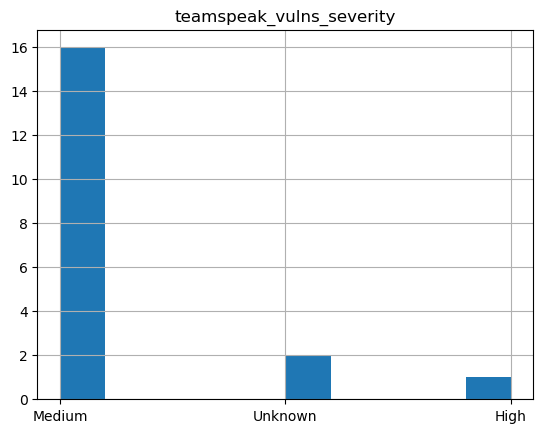

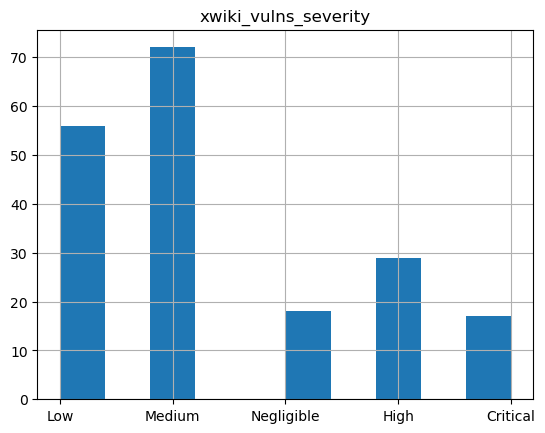

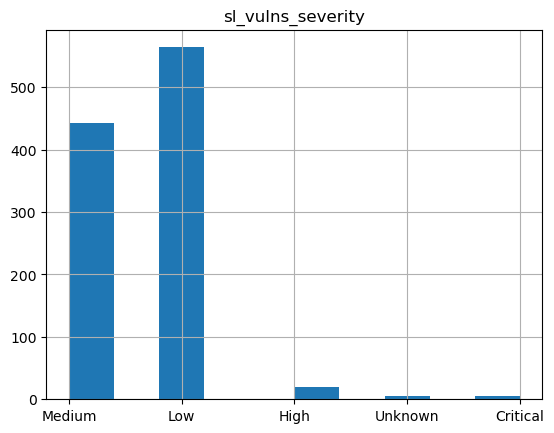

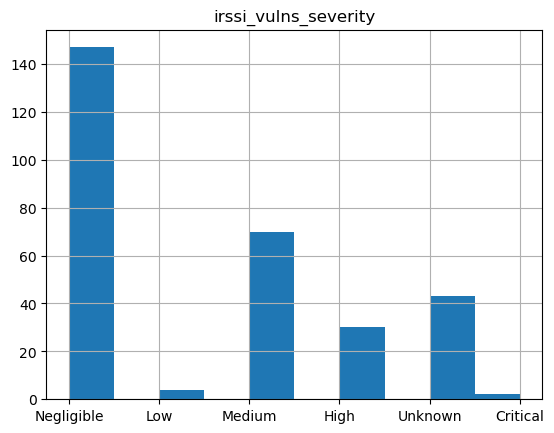

In [7]:
for container in containers:
    df.loc[df['Container'] == container]['Severity'].hist()
    plt.title(container+"_vulns_severity")
    plt.show()

In [10]:
len(df.loc[df['Severity'] == "High"])

1432

In [6]:
len(df.loc[df['Container'] == "ruby"])

863

In [9]:
dfa = df.loc[df['Container'] == "ruby"]
len(dfa.loc[dfa['Severity'] == "Critical"])

5

In [21]:
df_aff = df.loc[df['Container'].isin(["almalinux", "eggdrop", "teamspeak", "nats", "busybox", "photon", "sl", "traefik"])]

In [22]:
print(df_aff.loc[df_aff['Status'].isin(["not-fixed"])])

      VulnerabilityID                 PkgName     Status Severity  Container
7720   CVE-2023-25587  redhat:distro:redhat:9  not-fixed   Medium  almalinux
7724   CVE-2021-20197  redhat:distro:redhat:9  not-fixed   Medium  almalinux
7726   CVE-2022-47011  redhat:distro:redhat:9  not-fixed      Low  almalinux
7727   CVE-2022-47010  redhat:distro:redhat:9  not-fixed      Low  almalinux
7728   CVE-2022-47008  redhat:distro:redhat:9  not-fixed      Low  almalinux
...               ...                     ...        ...      ...        ...
12247   CVE-2023-6135  redhat:distro:redhat:7  not-fixed   Medium         sl
12261   CVE-2014-3566  redhat:distro:redhat:7  not-fixed     High         sl
12262   CVE-2023-6135  redhat:distro:redhat:7  not-fixed   Medium         sl
12270   CVE-2014-3566  redhat:distro:redhat:7  not-fixed     High         sl
12271   CVE-2023-6135  redhat:distro:redhat:7  not-fixed   Medium         sl

[112 rows x 5 columns]


In [3]:
df = df[~df['VulnerabilityID'].str.contains('CVE', na=False)]
print(df)
df = df[~df['VulnerabilityID'].str.contains('TEMP', na=False)]
print(df)

           VulnerabilityID                     PkgName     Status Severity  \
297    GHSA-36jr-mh4h-2g58  github:language:javascript      fixed     High   
298    GHSA-4gmj-3p3h-gm8h  github:language:javascript      fixed      Low   
299    GHSA-jchw-25xp-jwwc  github:language:javascript      fixed   Medium   
301    GHSA-78xj-cgh5-2h22  github:language:javascript      fixed   Medium   
342    GHSA-9h6g-pr28-7cqp  github:language:javascript      fixed   Medium   
...                    ...                         ...        ...      ...   
11451  GHSA-5949-rw7g-wx7w        github:language:java      fixed     High   
11452  GHSA-57j2-w4cx-62h2        github:language:java      fixed     High   
11453  GHSA-mph4-vhrx-mv67        github:language:java      fixed   Medium   
11454  GHSA-cmfg-87vq-g5g4        github:language:java      fixed   Medium   
11455  GHSA-2363-cqg2-863c        github:language:java  not-fixed     High   

           Container  
297    kibana:8.12.2  
298    kibana:8.1